In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import koreanize_matplotlib
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [4]:
data = pd.read_csv("iris3.csv",encoding="utf-8")

In [5]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## 텐서플로우 불러오기

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
X = data.drop("species",axis=1)
y = data["species"]

In [15]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y = pd.get_dummies(y)
y # 원 - 핫 인코딩

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

In [24]:
X_train.shape

(120, 4)

In [25]:
model = Sequential() #input_dim
model.add(Dense(12,input_dim=X_train.shape[1],activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(3,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss="categorical_crossentropy",optimizer ="adam",metrics=["accuracy"])
history = model.fit(X_train,y_train,epochs=50,batch_size=5,validation_data=(X_test,y_test))

Epoch 1/50
24/24 [==============================] - 1s 10ms/step - loss: 1.0495 - accuracy: 0.3250 - val_loss: 0.9709 - val_accuracy: 0.3667
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.9707 - accuracy: 0.2750 - val_loss: 0.9323 - val_accuracy: 0.4000
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.9304 - accuracy: 0.5667 - val_loss: 0.8937 - val_accuracy: 0.7333
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.8897 - accuracy: 0.6417 - val_loss: 0.8528 - val_accuracy: 0.7000
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.8466 - accuracy: 0.6417 - val_loss: 0.8136 - val_accuracy: 0.7000
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.8028 - accuracy: 0.6333 - val_loss: 0.7729 - val_accuracy: 0.7000
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.7598 - accuracy: 0.6333 - val_loss: 0.7225 - val_accuracy: 0.7000
Epoch 8/50
24/24 [=

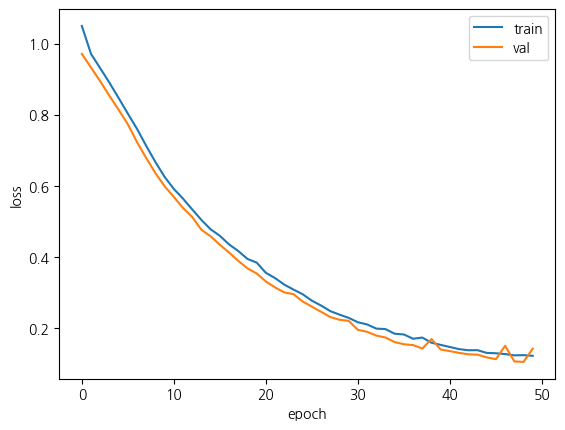

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## 초음파 광물 데이터셋

In [30]:
df = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/sonar3.csv",encoding="utf-8",header=None)

In [31]:
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [34]:
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

In [35]:
X2 = df.drop(60,axis=1)
y2 = df[60]

In [37]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=8)

In [39]:
X_train2.shape

(166, 60)

In [43]:
# 딥러닝 네트워크 

deep_model = Sequential()
deep_model.add(Dense(24,input_dim=X_train2.shape[1],activation="relu"))
deep_model.add(Dense(10,activation="relu"))
deep_model.add(Dense(1,activation="sigmoid"))
deep_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 24)                1464      
                                                                 
 dense_10 (Dense)            (None, 10)                250       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [45]:
deep_model.compile(loss="binary_crossentropy",optimizer ="adam",metrics=["accuracy"])
deep_history= deep_model.fit(X_train2,y_train2,epochs=200,batch_size=10)

Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.5241
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.5723
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6419 - accuracy: 0.6084
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6340 - accuracy: 0.6506
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.6446
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6109 - accuracy: 0.6867
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.6747
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5878 - accuracy: 0.6687
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5749 - accuracy: 0.7470
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5646 - accuracy: 0.7048
Epoch 11/

Epoch 83/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1474 - accuracy: 0.9639
Epoch 84/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1497 - accuracy: 0.9578
Epoch 85/200
17/17 [==============================] - 0s 997us/step - loss: 0.1451 - accuracy: 0.9518
Epoch 86/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1368 - accuracy: 0.9578
Epoch 87/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1345 - accuracy: 0.9699
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1422 - accuracy: 0.9578
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1264 - accuracy: 0.9759
Epoch 90/200
17/17 [==============================] - 0s 928us/step - loss: 0.1391 - accuracy: 0.9578
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1212 - accuracy: 0.9639
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1255 - accuracy: 0.9

17/17 [==============================] - 0s 977us/step - loss: 0.0281 - accuracy: 1.0000
Epoch 165/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 1.0000
Epoch 166/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0263 - accuracy: 1.0000
Epoch 167/200
17/17 [==============================] - 0s 746us/step - loss: 0.0263 - accuracy: 1.0000
Epoch 168/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 1.0000
Epoch 169/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 1.0000
Epoch 170/200
17/17 [==============================] - 0s 272us/step - loss: 0.0236 - accuracy: 1.0000
Epoch 171/200
17/17 [==============================] - 0s 977us/step - loss: 0.0227 - accuracy: 1.0000
Epoch 172/200
17/17 [==============================] - 0s 977us/step - loss: 0.0225 - accuracy: 1.0000
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 1

In [46]:
# 딥러닝 모델의 성능 검증 model.evalute(X_test,y_test)
score = deep_model.evaluate(X_test2,y_test2)
print(f'loss: {score[0]}')
print(f'Accuracy: {score[1]}')

2/2 [==============================] - 0s 16ms/step - loss: 0.8563 - accuracy: 0.7619
loss: 0.8562743067741394
Accuracy: 0.761904776096344


In [47]:
## 모델 저장하기 model.save('저장경로 및 파일 이름.hdf5')
model.save("stone_model1.hdf5")

In [48]:
## 모델 다시 불러오기 
from tensorflow.keras.models import load_model 

In [49]:
load_model = load_model("stone_model1.hdf5")

In [50]:
load_model

In [55]:
score3 = load_model.evaluate(X_test,y_test)
print(f'loss: {score3[0]}')
print(f'Accuracy: {score3[1]}')

1/1 [==============================] - 0s 115ms/step - loss: 0.1414 - accuracy: 0.9333
loss: 0.1414017677307129
Accuracy: 0.9333333373069763
